## Libs

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## importando df

In [ ]:
df = pd.read_csv("./train.csv")

df.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,265519,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,...,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32,0
1,180306,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,...,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99,0
2,42665,41191.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,...,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10,0
3,198724,132624.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,...,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10,0
4,82326,59359.0,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,...,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10,0


## Checando valores ausentes

In [ ]:
df.isnull().sum()

,0
id,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0


## Checando desbalanceamento

In [ ]:
print(f"Linhas: {df.shape[0]}")
print(f"Colunas: {df.shape[1]}")

Linhas: 227845
Colunas: 32


In [ ]:
df['Class'].value_counts()

,count
Class,
0,227451
1,394


Classes extremamente desbalanciadas. Talvez um balenceamento muito brusco de classes confuda os modelos que considerariam transacoes como fraudulentas com uma frequencia muito maior que o comum, isso pode fazer o modelo não absorver a distribuição natural do problema

## Análise do valor da transação

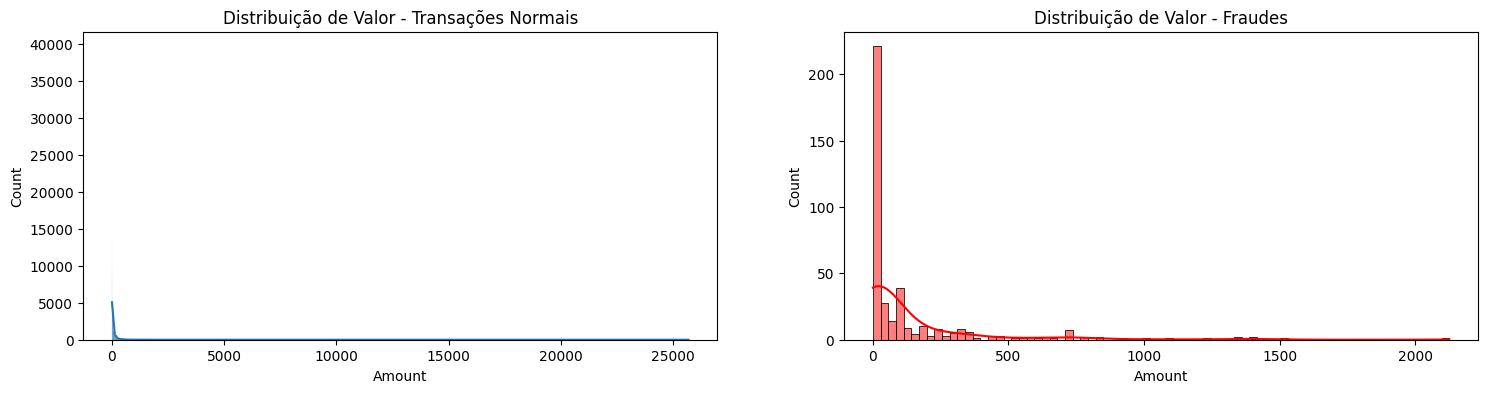

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

sns.histplot(df[df['Class'] == 0]['Amount'], ax=ax[0], kde=True)
ax[0].set_title('Distribuição de Valor - Transações Normais')

sns.histplot(df[df['Class'] == 1]['Amount'], ax=ax[1], kde=True, color='r')
ax[1].set_title('Distribuição de Valor - Fraudes')

plt.show()

Text(0.5, 1.0, 'Comparação de Valores (Escala Log)')

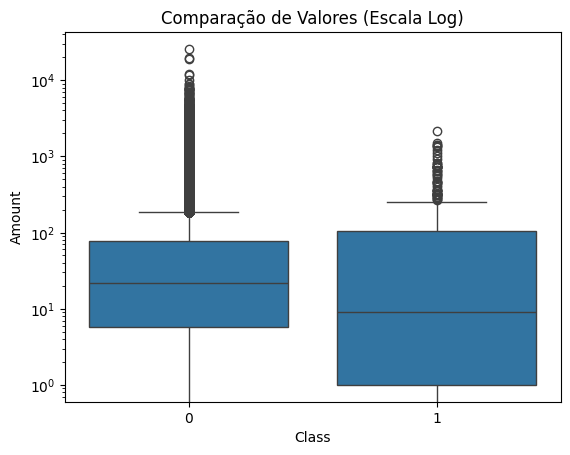

In [ ]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.yscale('log')
plt.title('Comparação de Valores (Escala Log)')

Em geral o valor de transacoes fraudulentas apresentam um valor central abaixo das não fraudulentas, com uma caixa mais larga mostra uma maior variação em valores menores, mais próximos de 1, oq eu pode mostrar uma alta presença de "teste de cartões". Quando olhamos para as instancias com valores mais elevados, percebemos que transacoes fraudulentas tendem a ter um teto mais baixo(pouco mais de 2000), talvez para despistar sem 'outlaiers muito estravagantes'

Robust Scaler pode ser mais indicado por ser menos sensível aos outlaiers identificados nos boxplots

## Análise da variável 'time'

/tmp/ipython-input-4209282287.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0]['Hour'], label='Normal', shade=True)
/tmp/ipython-input-4209282287.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1]['Hour'], label='Fraude', shade=True, color='r')


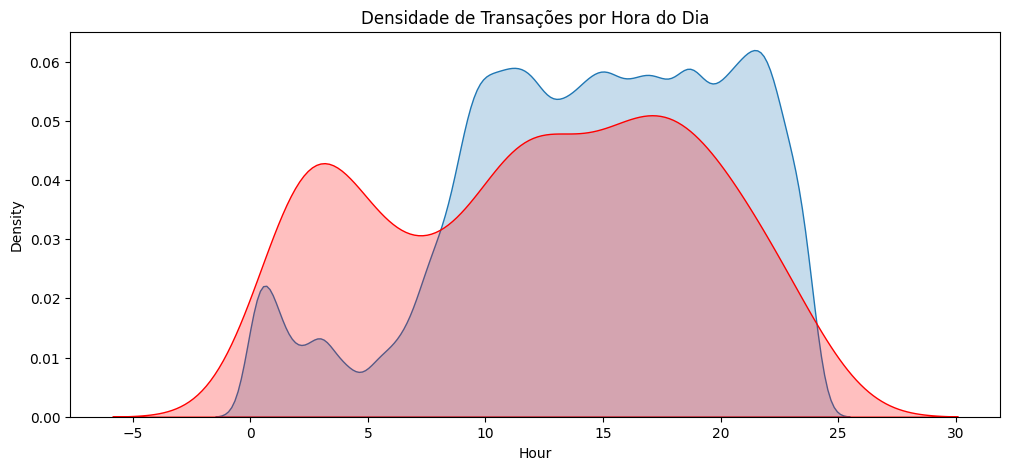

In [ ]:
# Convertendo segundos para "hora do dia"
df['Hour'] = (df['Time'] / 3600) % 24

plt.figure(figsize=(12,5))
sns.kdeplot(df[df['Class'] == 0]['Hour'], label='Normal', shade=True)
sns.kdeplot(df[df['Class'] == 1]['Hour'], label='Fraude', shade=True, color='r')
plt.title('Densidade de Transações por Hora do Dia')
plt.show()

Transacoes fraudulentas sao visivelmente mais constantes durante todo o dia, ficando abaixo em concentracao nos horarios comerceial e de lazer em comparacao com transacoes normais. Mas podemos ver principalmente que transacoes fraudulentas possuem uma concentracao muito maior que transacoes normais nas primeiras horas do dia

talvez criar uma nova variavel binaria que diz se a transacao foi feita nas primeiras horas do dia traga mais informacao para os modelos

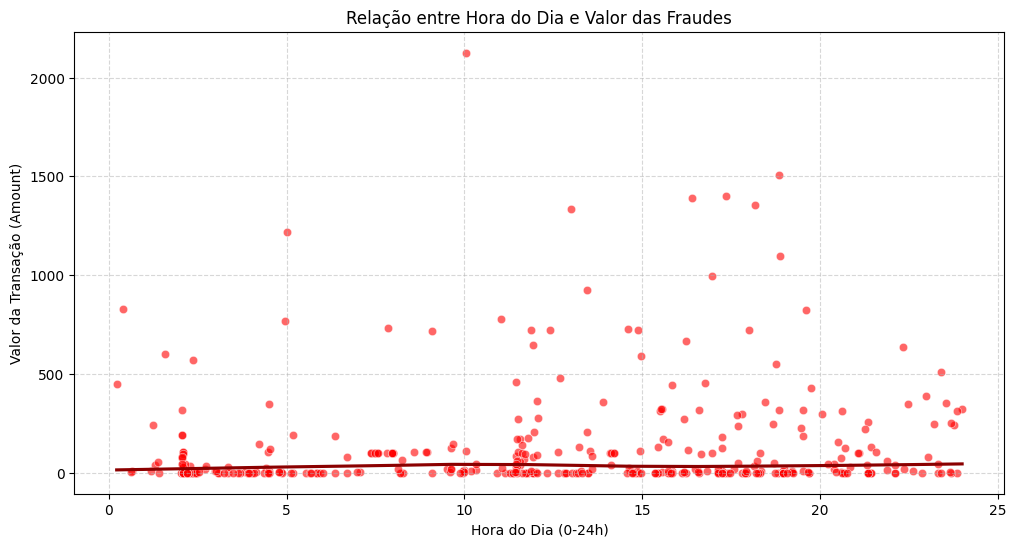

In [ ]:
# transacoes fraudulentas concentram os baixos valores na madrugada?

df['Hour'] = (df['Time'] / 3600) % 24
fraudes = df[df['Class'] == 1]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=fraudes, x='Hour', y='Amount', alpha=0.6, color='red')

sns.regplot(data=fraudes, x='Hour', y='Amount', scatter=False, color='darkred', lowess=True)

plt.title('Relação entre Hora do Dia e Valor das Fraudes')
plt.xlabel('Hora do Dia (0-24h)')
plt.ylabel('Valor da Transação (Amount)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Pensei que as transacoes com valores mais baixos pudessem estar concentradas na madraugada, mas pelo grafico posso ver que elas ficam distribuidas durante todo o dia.


## Checar diferenca na distribuicao das variaveis entre as classes

/tmp/ipython-input-2020265548.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Class'] == 0][col], label='Normal')
/tmp/ipython-input-2020265548.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Class'] == 1][col], color='r', label='Fraude')
/tmp/ipython-input-2020265548.py:6:

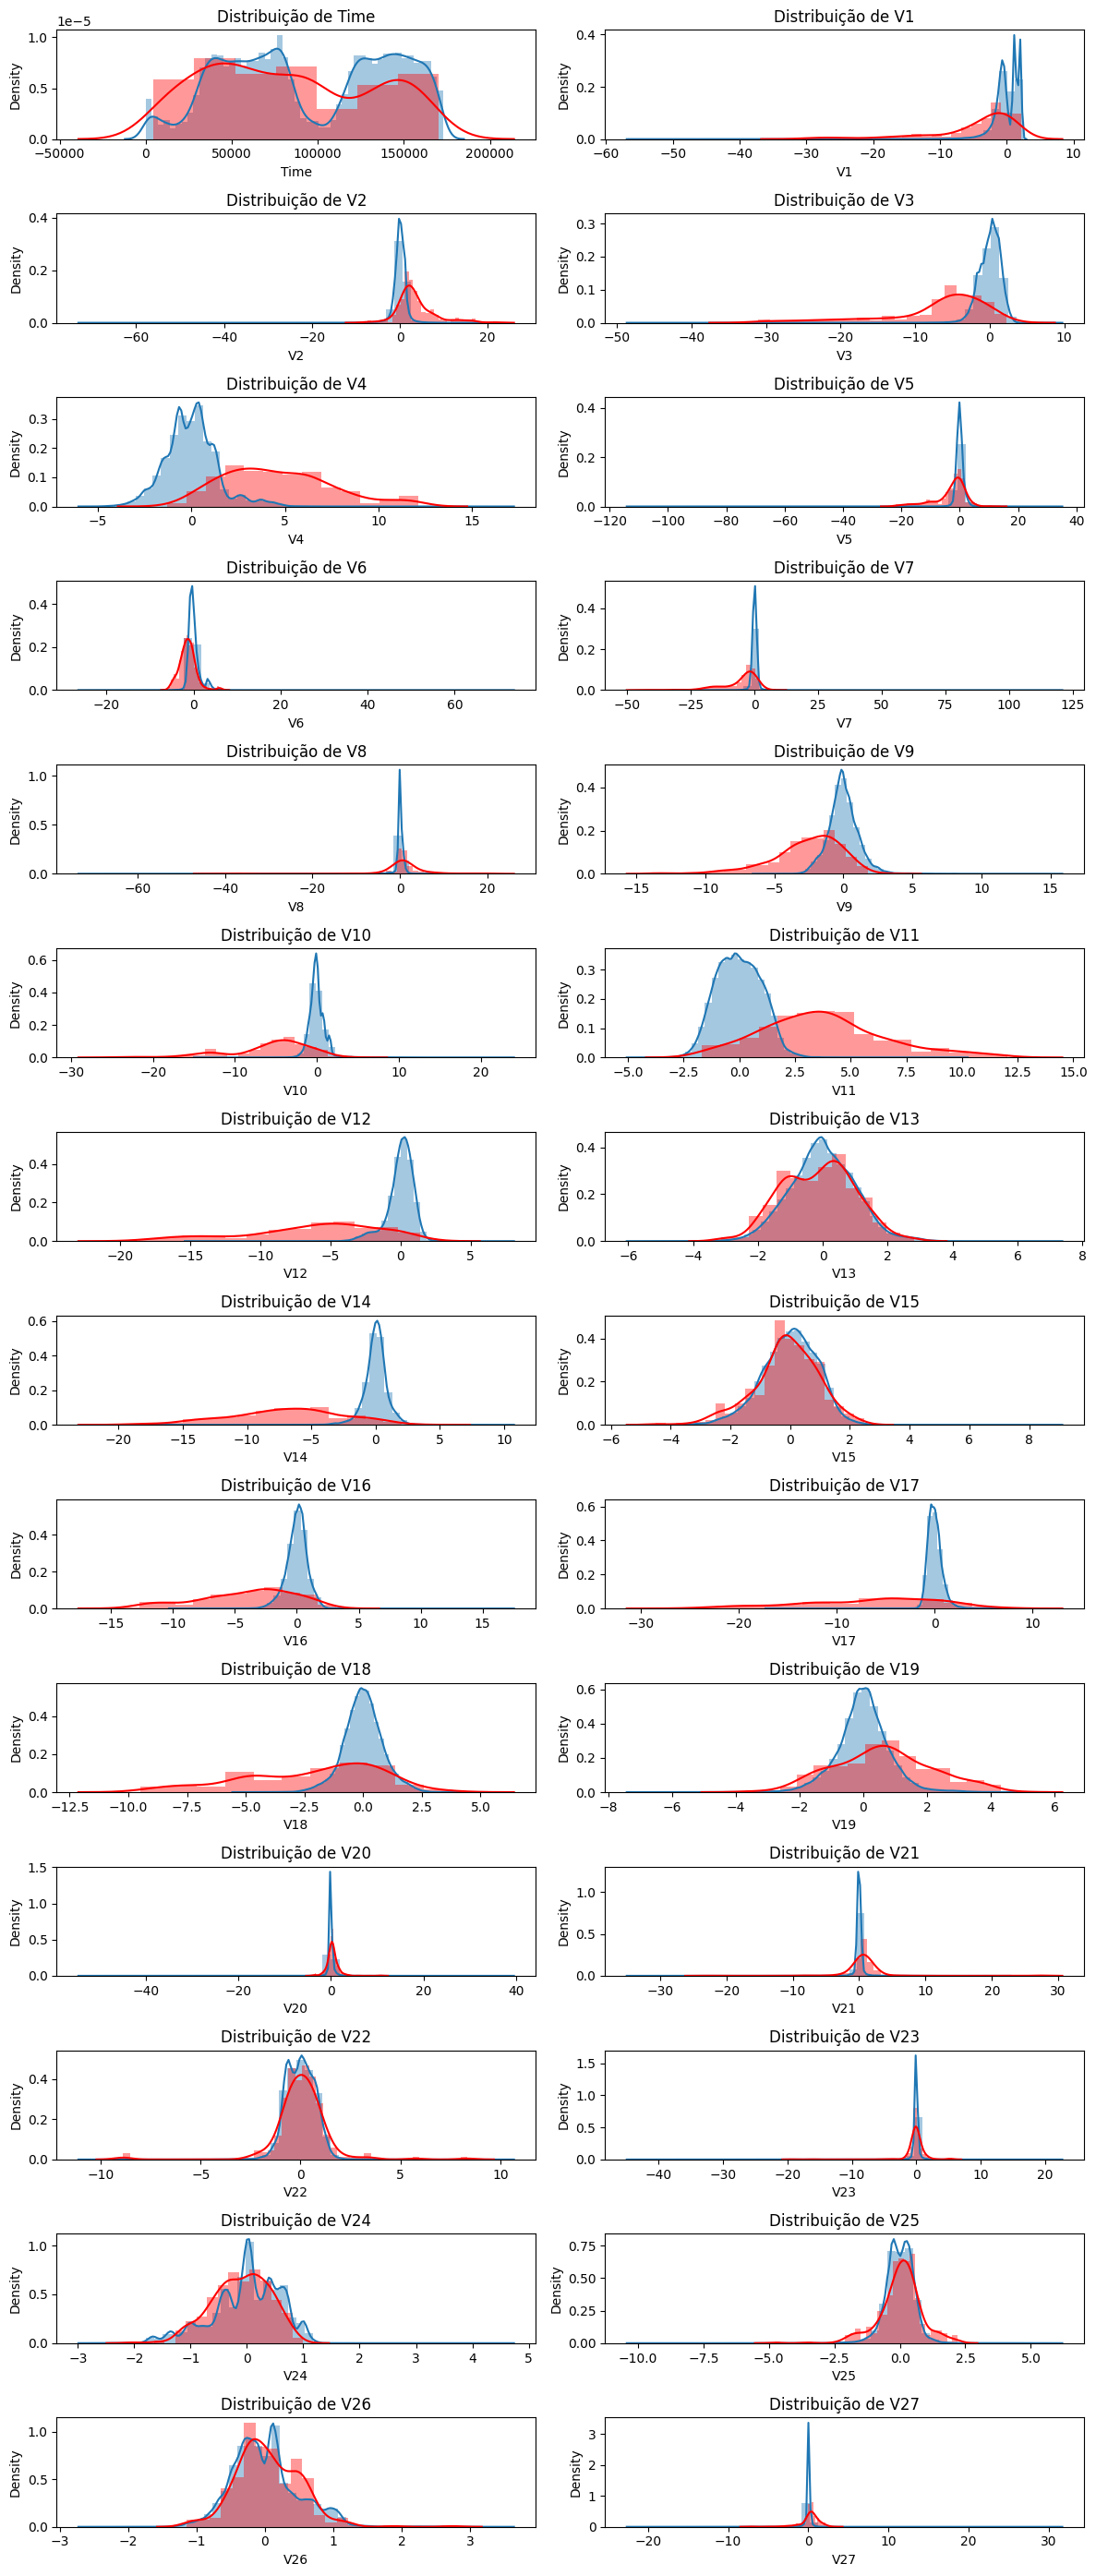

In [ ]:
v_features = df.columns[1:29] # Seleciona de V1 a V28

plt.figure(figsize=(12, 28))
for i, col in enumerate(v_features):
    plt.subplot(14, 2, i+1)
    sns.distplot(df[df['Class'] == 0][col], label='Normal')
    sns.distplot(df[df['Class'] == 1][col], color='r', label='Fraude')
    plt.title(f'Distribuição de {col}')
plt.tight_layout()

## Matriz de correlação

como as variaveis resultam de uma transformacao pca, elas já são independentes, mas vale ver a correlacao de cada uma com a Classe

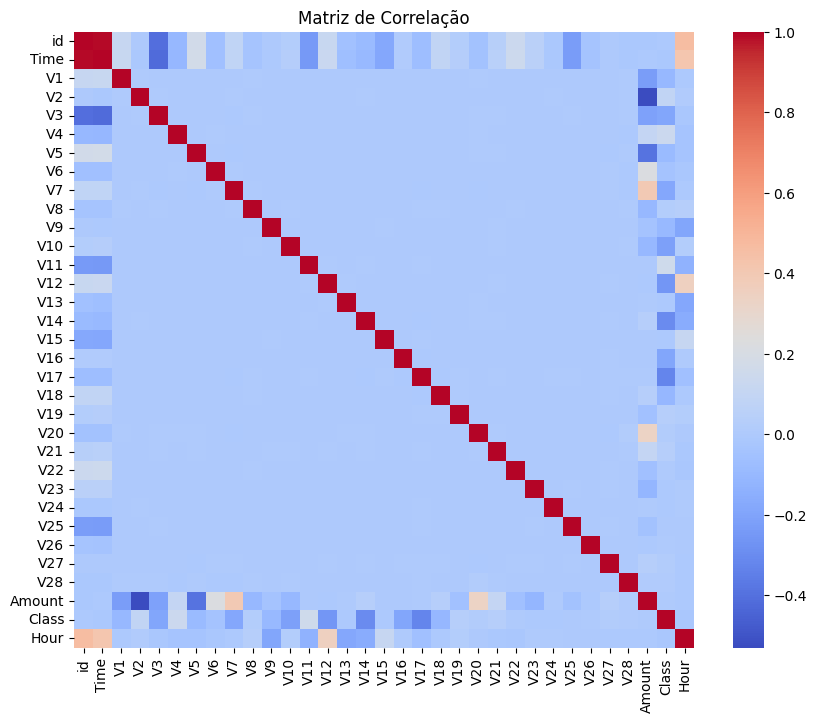

In [ ]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Matriz de Correlação')
plt.show()